In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
from matplotlib import rcParams

In [28]:
daily_peak_df=pd.read_excel('Data/niti/Daily_Peak_Demand7.xlsx',skipfooter=4)
daily_peak_df.dropna(inplace=True)
daily_peak_df['Date']=pd.to_datetime(daily_peak_df['Date'],format='%d-%m-%Y')

In [11]:
daily_peak_df.head()

,Date,Peak Demand Met
19,2017-04-20,158628.0
20,2017-04-21,155542.0
21,2017-04-22,152714.0
22,2017-04-23,150590.0
23,2017-04-24,157035.0


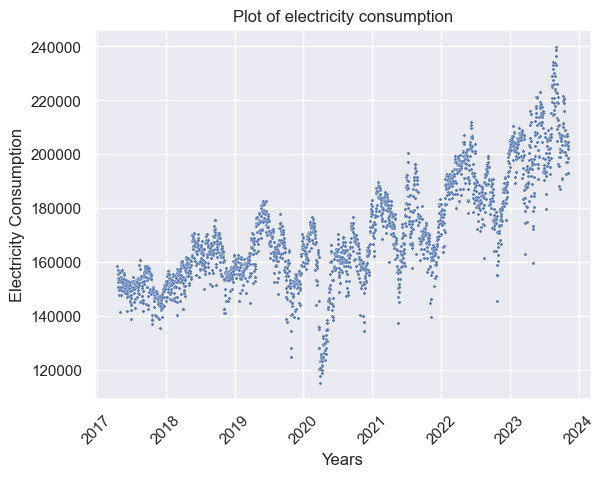

In [8]:
sns.set(style="darkgrid")

sns.scatterplot(data=daily_peak_df,x=daily_peak_df['Date'],y='Peak Demand Met',s=5)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=4)
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-Q%q'))
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Years")
plt.ylabel("Electricity Consumption")
plt.title("Plot of electricity consumption")
plt.savefig('Data/images/Cons_daily.png',dpi=400,bbox_inches='tight')
plt.show()


In [21]:
##code for quarter as xticks
# daily_peak_df.set_index('Date',inplace=True)
# quarters = daily_peak_df.index.to_period('Q')
# xtick_labels = [f"Q{q.quarter} {q.year}" for q in quarters]
# plt.xticks(quarters.to_timestamp(), xtick_labels)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

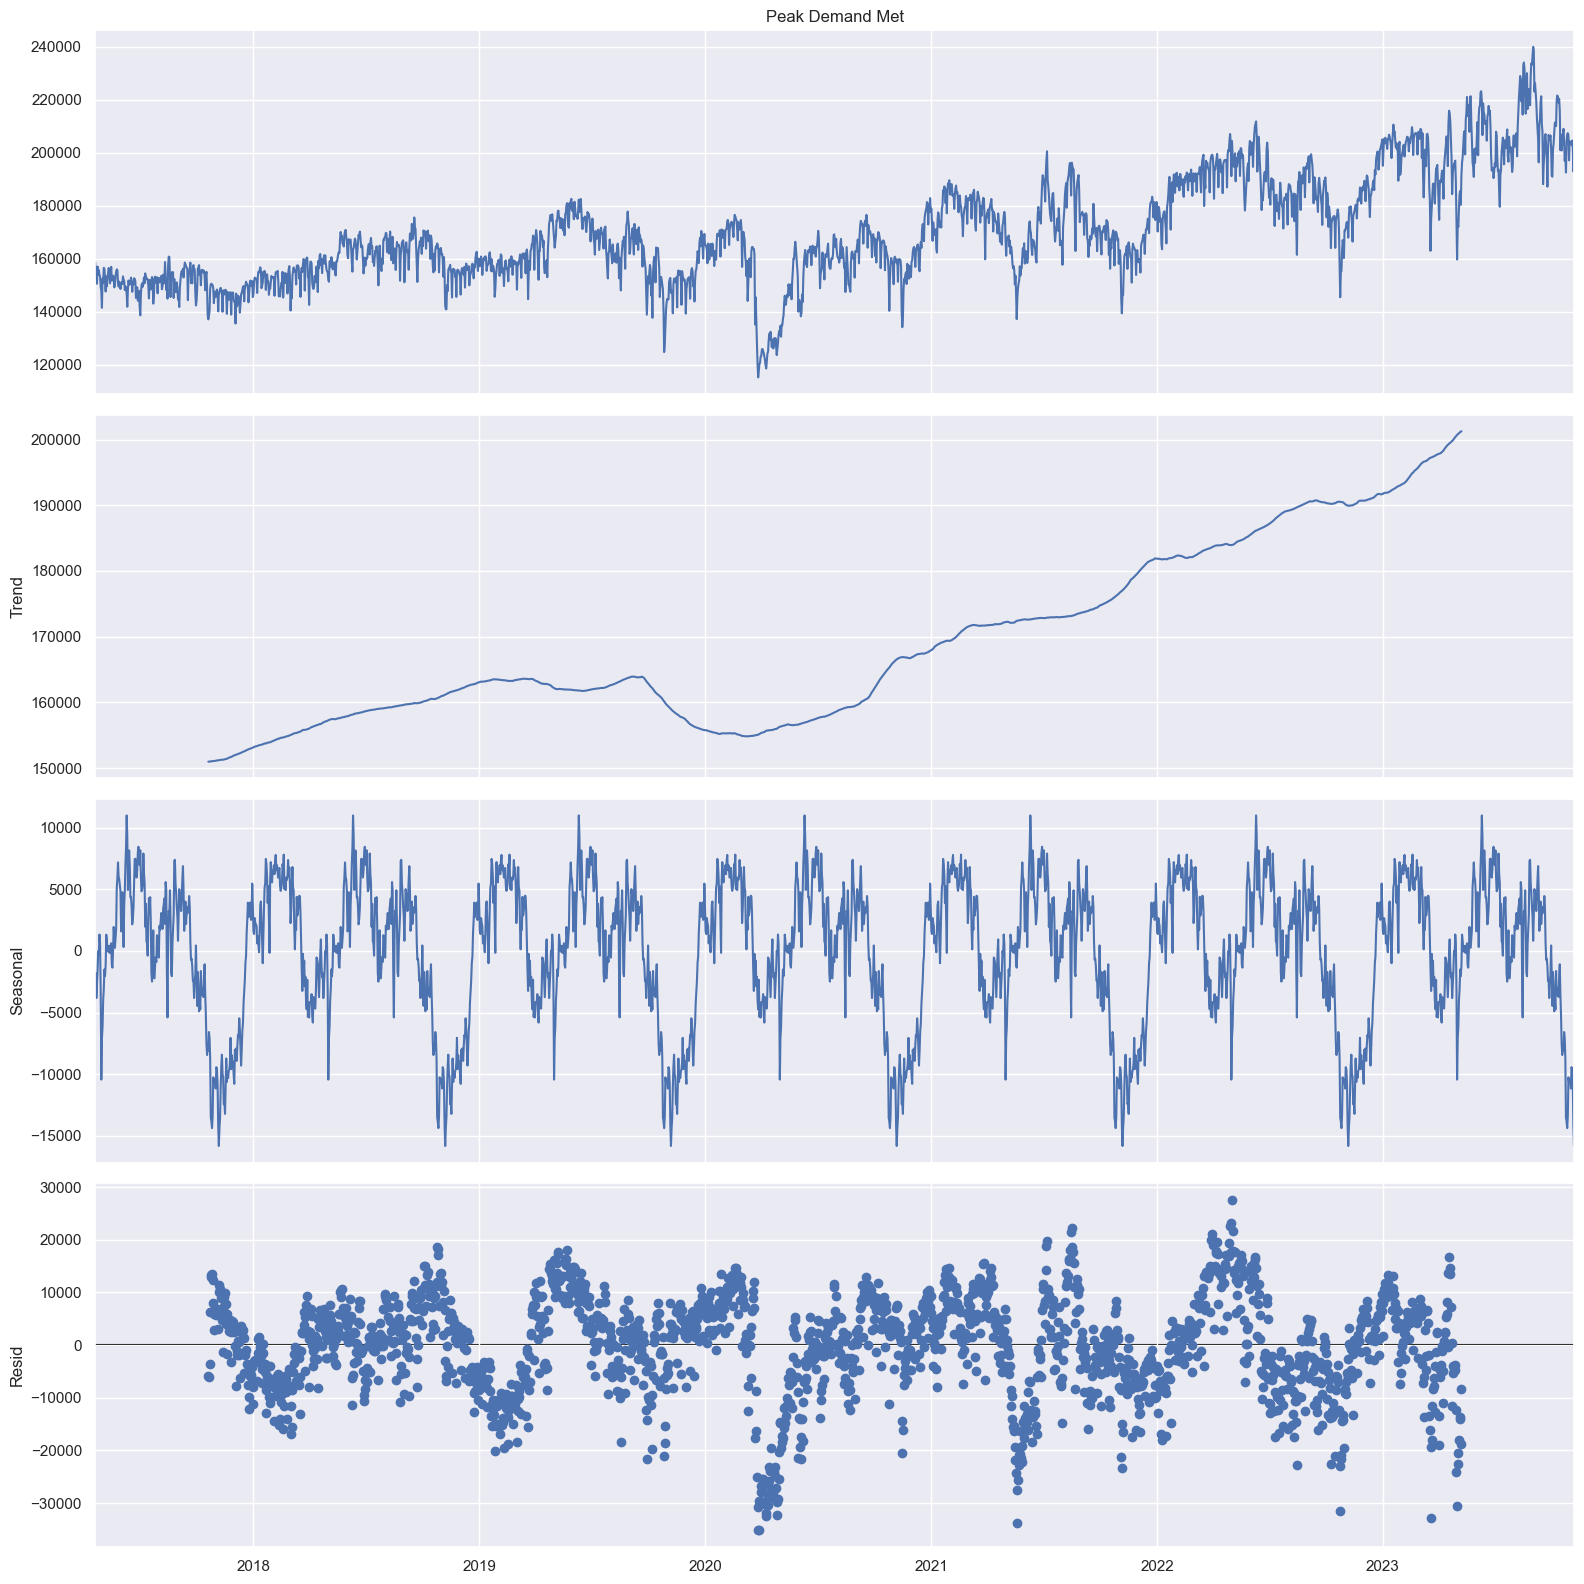

In [38]:
# daily_peak_df.set_index('Date',inplace=True)
decomposition = sm.tsa.seasonal_decompose(daily_peak_df['Peak Demand Met'],period=(365))

rcParams["figure.figsize"] = 16, 16
decomposition.plot();